## Import Packages

In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_ccf, plot_accf_grid
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

import matplotlib.pyplot as plt

# Load custom packages
%load_ext autoreload
%autoreload 2

from tsa_psf import generate_multivariate_ar

## Generate Synthetic Multivariate Time Series Data with Autocorrelations

In [2]:
data = generate_multivariate_ar(T=100, D=20, lags=[2, 8, 10], coefs=[.4, .3, .3], noise_std=0.5, seed=412)

# Convert to DataFrame
col_names = [f"var_{i+1}" for i in range(data.shape[1])]
time_series_df = pd.DataFrame(data, columns=col_names)

# Choose variables for which stationarity holds
time_series_df = time_series_df[['var_5','var_17']]
dim = time_series_df.shape[1]

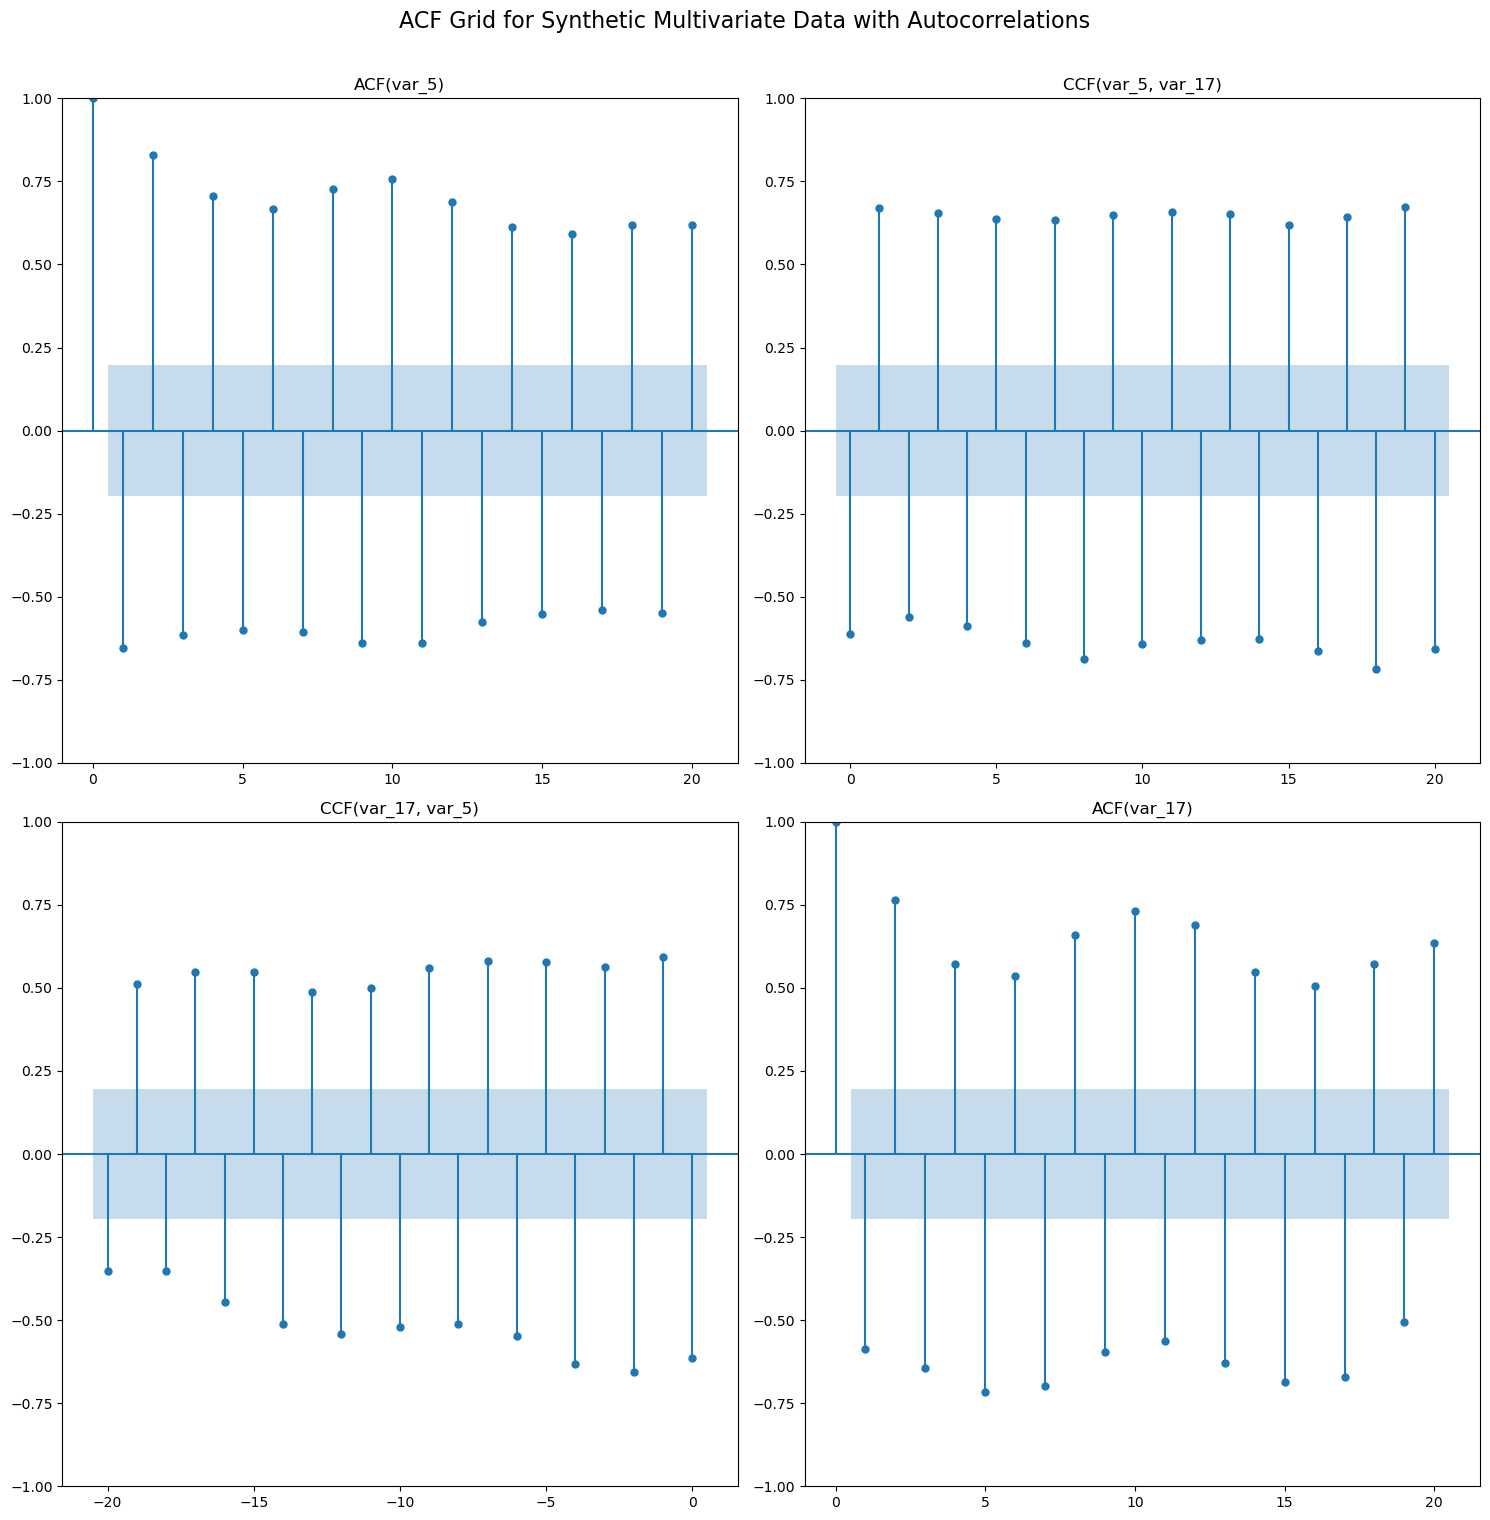

In [3]:
# Visualize auto/cross-correlation grid
alpha = 0.05  # Significance level
lags = 20     # Time lags

fig = plt.figure(figsize=(15, 15))
plot_accf_grid(time_series_df, lags=lags, alpha=alpha, fig=fig)
plt.suptitle('ACF Grid for Synthetic Multivariate Data with Autocorrelations', fontsize=16, y=1.01)
plt.tight_layout() 
plt.show()

## Check for Stationarity using Augmented Dickey-Fuller (ADF) Test

In [4]:
for column in time_series_df.columns:
    result = adfuller(time_series_df[column])
    print(f'ADF Statistic for {column}: {result[0]}')
    print(f'p-value for {column}: {result[1]}')
    if result[1] <= 0.05:
        print(f"  --> {column} is stationary\n")
    else:
        print(f"  --> {column} is non-stationary (needs more differencing)\n")

ADF Statistic for var_5: -2.901570128171668
p-value for var_5: 0.04516571735069026
  --> var_5 is stationary

ADF Statistic for var_17: -2.9900393345604073
p-value for var_17: 0.03583512970912024
  --> var_17 is stationary



## Fit a Vector Autoregressive (VAR) model with Zero Lag

In [5]:
# Fit a VAR model with zero lag in order to treat the data as the residuals of a model with no parameters
var_model = VAR(time_series_df)
var_data = var_model.fit(maxlags=0)

var_data.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 29, Sep, 2025
Time:                     02:04:52
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  -0.375407
Nobs:                     100.000    HQIC:                 -0.406423
Log likelihood:          -260.412    FPE:                   0.652131
AIC:                    -0.427511    Det(Omega_mle):        0.639282
--------------------------------------------------------------------
Results for equation var_5
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.825150         0.102866           -8.022           0.000

Results for equation var_17
           coefficient       std. error           t-stat            prob
---------------------------------------------------------------

## Perform Multivariate Ljung-Box Test

In [6]:
# Perform the multivariate Ljung-Box test on the series obtained after fitting the VAR model to the data
whiteness_test_results_test = var_data.test_whiteness(nlags=20, signif=0.05)

whiteness_test_results_test.summary()

Test statistic,Critical value,p-value,df
1270.,101.9,0.000,80
